## Basic Data Visualizations in Python

This python notebook has been inspired entirely from the following link on Kaggle. Dataset used is iris, the most famous sample data used for data science tutorials. Python modules used in this notebook include the following:

<ol>
<li>pandas</li>
<li>matplotlib</li>
<li>seaborn</li>
</ol>

<https://www.kaggle.com/benhamner/d/uciml/iris/python-data-visualizations>

In [1]:
# First, we'll import pandas, a data processing and CSV file I/O library
import pandas as pd

# We'll also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
# Let's the plots to be printed within the cells
%pylab inline 
sns.set(style="white", color_codes=True)

# Next, we'll load the Iris flower dataset, which is in the local directory
iris = pd.read_csv("iris.csv") # the iris dataset is now a Pandas DataFrame

# Let's see what's in the iris data
iris.head()

# Press shift+enter to execute this cell

Populating the interactive namespace from numpy and matplotlib


,Id,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [2]:
# Let's see how many examples we have of each species
iris["Species"].value_counts()

setosa        50
versicolor    50
virginica     50
dtype: int64

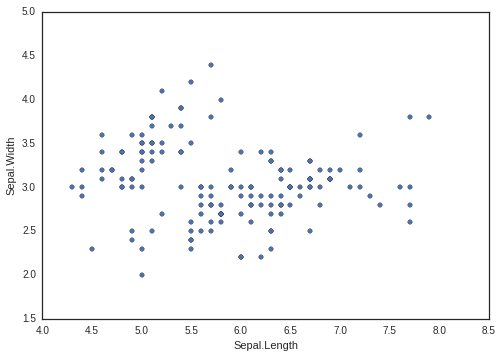

In [3]:
# The first way we can plot things is using the .plot extension from Pandas dataframes
# We'll use this to make a scatterplot of the Iris features.
iris.plot(kind="scatter", x="Sepal.Length", y="Sepal.Width")

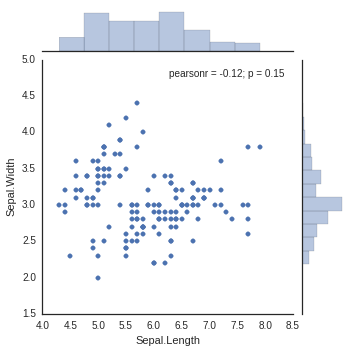

In [4]:
# We can also use the seaborn library to make a similar plot
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x="Sepal.Length", y="Sepal.Width", data=iris, size=5)

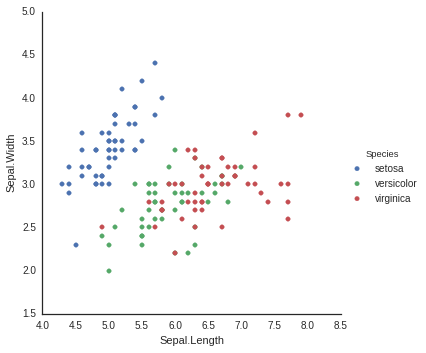

In [5]:
# One piece of information missing in the plots above is what species each plant is
# We'll use seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(iris, hue="Species", size=5) \
   .map(plt.scatter, "Sepal.Length", "Sepal.Width") \
   .add_legend()

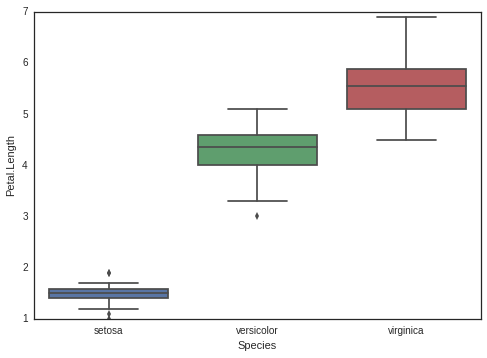

In [6]:
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="Species", y="Petal.Length", data=iris)

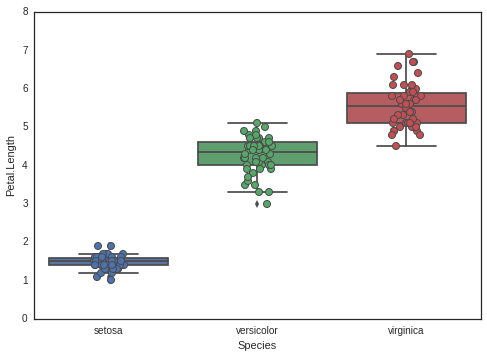

In [7]:
# One way we can extend this plot is adding a layer of individual points on top of
# it through Seaborn's striplot
# 
# We'll use jitter=True so that all the points don't fall in single vertical lines
# above the species
#
# Saving the resulting axes as ax each time causes the resulting plot to be shown
# on top of the previous axes
ax = sns.boxplot(x="Species", y="Petal.Length", data=iris)
ax = sns.stripplot(x="Species", y="Petal.Length", data=iris, jitter=True, edgecolor="gray")

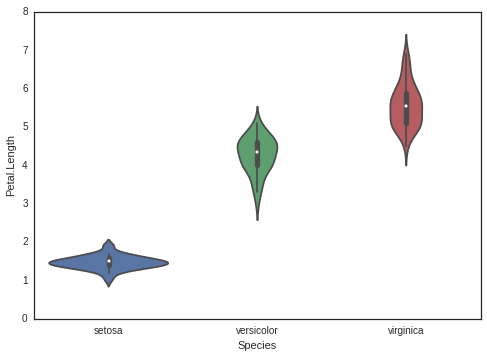

In [8]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot
sns.violinplot(x="Species", y="Petal.Length", data=iris, size=6)

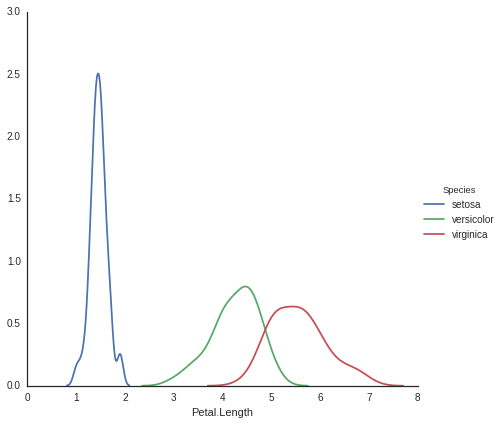

In [9]:
# A final seaborn plot useful for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature
sns.FacetGrid(iris, hue="Species", size=6) \
   .map(sns.kdeplot, "Petal.Length") \
   .add_legend()

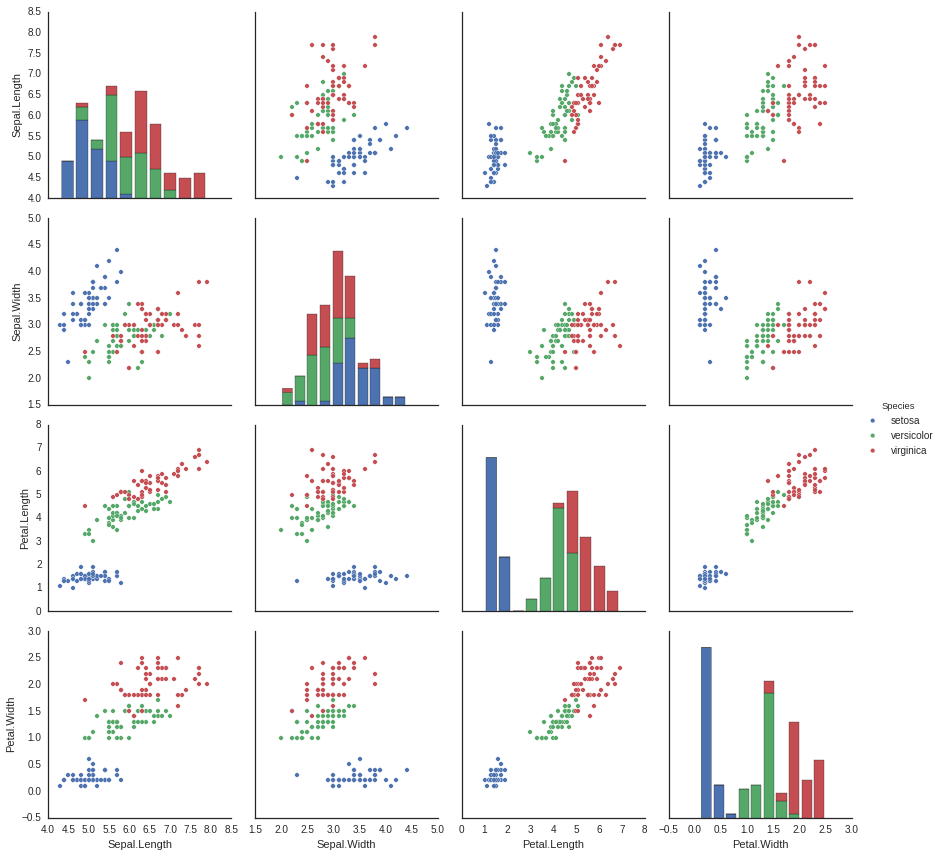

In [10]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
# 
# From the pairplot, we'll see that the Iris-setosa species is separataed from the other
# two across all feature combinations
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3)

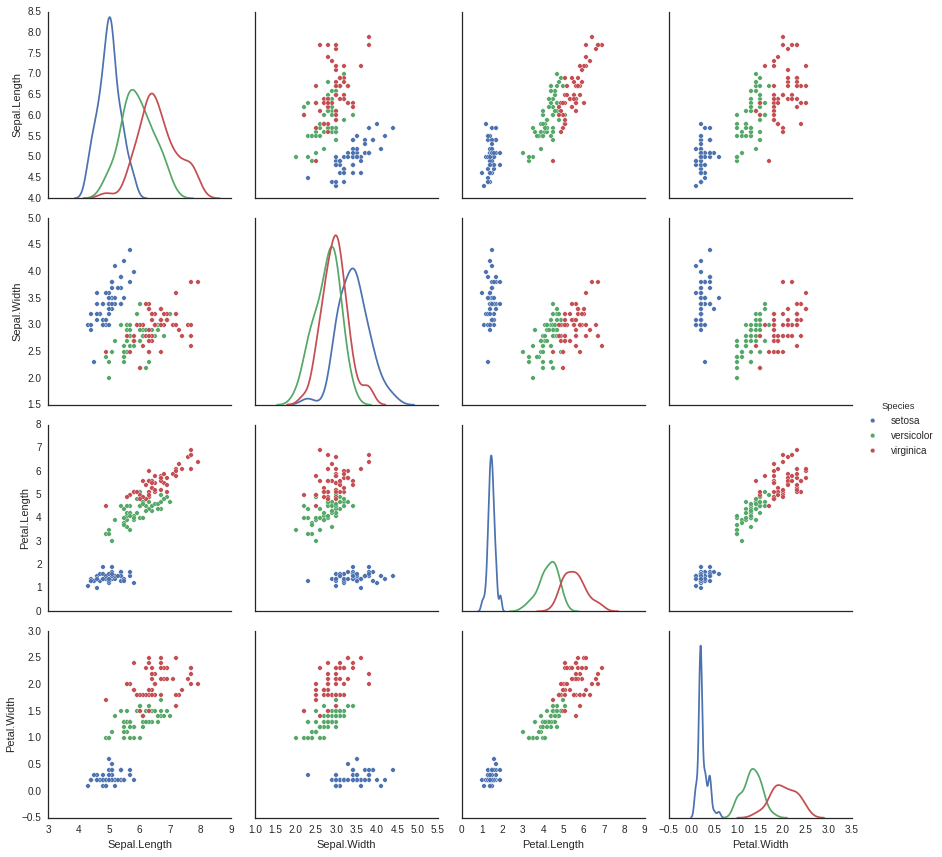

In [11]:
# The diagonal elements in a pairplot show the histogram by default
# We can update these elements to show other things, such as a kde
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3, diag_kind="kde")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f08d4082fd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f08cfedbdd0>]], dtype=object)

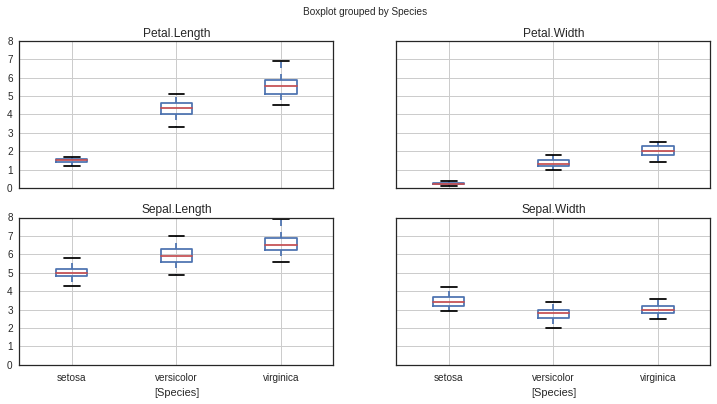

In [12]:
# Now that we've covered seaborn, let's go back to some of the ones we can make with Pandas
# We can quickly make a boxplot with Pandas on each feature split out by species
iris.drop("Id", axis=1).boxplot(by="Species", figsize=(12, 6))

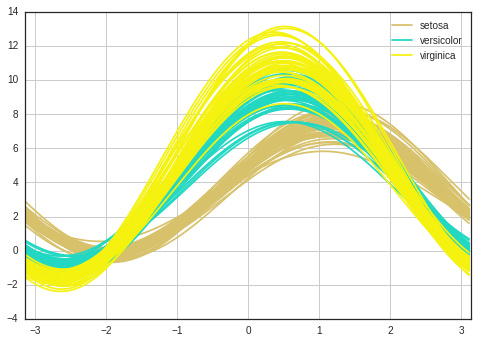

In [ ]:
# One cool more sophisticated technique pandas has available is called Andrews Curves
# Andrews Curves involve using attributes of samples as coefficients for Fourier series
# and then plotting these
from pandas.tools.plotting import andrews_curves
andrews_curves(iris.drop("Id", axis=1), "Species")

In [ ]:
# Another multivariate visualization technique pandas has is parallel_coordinates
# Parallel coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(iris.drop("Id", axis=1), "Species")

In [ ]:
# A final multivariate visualization technique pandas has is radviz
# Which puts each feature as a point on a 2D plane, and then simulates
# having each sample attached to those points through a spring weighted
# by the relative value for that feature
from pandas.tools.plotting import radviz
radviz(iris.drop("Id", axis=1), "Species")